To note:

- No idea what b is 
- Below is a couple of definitions from the GitHub page which might come in handy

Link travel time = free flow time * ( 1 + B * (flow/capacity)^Power ).
Link generalized cost = Link travel time + toll_factor * toll + distance_factor * distance

# Setup: import packages

In [1]:
#install packages if required
#%pip install networkx

In [2]:
#import packages 
import os
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import graphviz
import scipy.integrate as integrate 
from scipy.optimize import minimize_scalar
from scipy.misc import derivative
import numpy as np
import os
from random import *

In [3]:
#create cities dictionary
def make_dict(cities):
    cities_dict = {}
    for city in cities:
        link_file_path = data_path + city + '/' + city + '_net.tntp.txt'
        node_file_path = data_path + city + '/' + city +'_nodes.tntp.txt'
        trip_file_path = data_path + city + '/' + city + '_trips.tntp.txt'
        cities_dict[city] = {}
        to_add = {'link_file_path': link_file_path, 'node_file_path': node_file_path, 'trip_file_path': trip_file_path}
        cities_dict[city]['file_paths'] = to_add 
    return cities_dict

# Set file paths and city

In [4]:
data_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/'
cities = ['Berlin-Prenzlauerberg-Center']
data_path = data_path 
os.chdir(data_path)

# Import required classes

In [5]:
classes_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/Berlin/pytrans_working_multiple_eq_flow'
#network_analysis_path_niamh = r'C:\Users\35387\OneDrive\Documents\Networks\New folder\Networks_Term_Paper\pytrans_UrbanNetworkAnalysis\pytrans\UrbanNetworkAnalysis\original_edited'
os.chdir(classes_path)
import Frank_Wolfe
import TransportationNetworks as tn
import visualize_graph
import custom_class

# Make dict

In [6]:
cities_dict = make_dict(cities)
cities_dict

{'Berlin-Prenzlauerberg-Center': {'file_paths': {'link_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Prenzlauerberg-Center/Berlin-Prenzlauerberg-Center_net.tntp.txt',
   'node_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Prenzlauerberg-Center/Berlin-Prenzlauerberg-Center_nodes.tntp.txt',
   'trip_file_path': '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Data/Berlin-Prenzlauerberg-Center/Berlin-Prenzlauerberg-Center_trips.tntp.txt'}}}

# instantiate class

In [7]:
#instantiate class 
trial_run = custom_class.fw_custom_algorithm(cities_dict)

# Observe one city

In [8]:
#set city for investigation
city = cities[0]

In [9]:
trial_run.create_links_csv()
cities_dict[city]['csv']

,init_node,term_node,capacity,length,free_flow_time,b,power,speed,toll,link_type
0,1,183,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
1,1,294,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
2,1,296,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
3,1,297,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
4,2,187,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
744,349,179,2400.0,156.0,24.666667,1.0,4.0,0.0,0.0,1
745,350,19,999999.0,0.0,0.000000,0.0,4.0,0.0,0.0,0
746,350,247,2400.0,379.0,14.000000,1.0,4.0,0.0,0.0,1
747,351,310,900.0,327.0,8.333333,1.0,4.0,0.0,0.0,1


# Plot graph

Total number of nodes in Berlin-Prenzlauerberg-Center: 352
Total number of edges in Berlin-Prenzlauerberg-Center: 749
Graph for: Berlin-Prenzlauerberg-Center


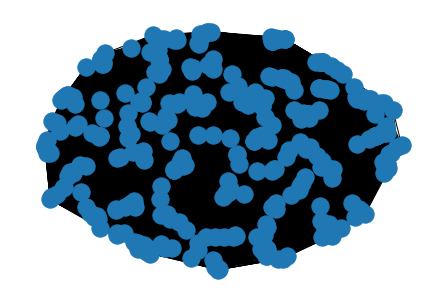

In [10]:
#Create csvs, plot graph and show summary stats
trial_run.summary_stats_all()
trial_run.plot(city)

# Observe example network data

In [11]:
#observe network with all links
remove_link = None #0 is equivalent to no links closed
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

No links removed
Berlin-Prenzlauerberg-Center graph is: DiGraph with 352 nodes and 749 edges
Berlin-Prenzlauerberg-Center origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']
Berlin-Prenzlauerberg-Center flows are: {('1', '2'): 55.61, ('1', '3'): 75.59, ('1', '4'): 67.54, ('1', '5'): 74.33, ('1', '6'): 3.48, ('1', '7'): 7.58, ('1', '8'): 6.57, ('1', '9'): 40.16, ('1', '10'): 29.24, ('1', '11'): 69.6, ('1', '12'): 3.09, ('1', '13'): 10.79, ('1', '14'): 94.31, ('1', '15'): 24.88, ('1', '16'): 11.42, ('1', '17'): 30.33, ('1', '18'): 10.26, ('1', '19'): 1.26, ('1', '20'): 3.13, ('1', '21'): 12.74, ('1', '22'): 19.18, ('1', '23'): 40.82, ('1', '24'): 47.69, ('1', '25'): 3.13, ('1', '26'): 6.65, ('1', '27'): 5.53, ('1', '28'): 6.39, ('1', '29'): 9.25, ('1', '30'): 7.29, ('1', '31'): 28.69, ('1', '32'): 5.08, (

In [12]:
#observe network after removing one link
remove_link = 0
trial_run.make_network(city, remove_link)
trial_run.network_attributes(city, remove_link)

Berlin-Prenzlauerberg-Center graph is: DiGraph with 352 nodes and 748 edges
Berlin-Prenzlauerberg-Center origin nodes are: ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']
Berlin-Prenzlauerberg-Center flows are: {('1', '2'): 55.61, ('1', '3'): 75.59, ('1', '4'): 67.54, ('1', '5'): 74.33, ('1', '6'): 3.48, ('1', '7'): 7.58, ('1', '8'): 6.57, ('1', '9'): 40.16, ('1', '10'): 29.24, ('1', '11'): 69.6, ('1', '12'): 3.09, ('1', '13'): 10.79, ('1', '14'): 94.31, ('1', '15'): 24.88, ('1', '16'): 11.42, ('1', '17'): 30.33, ('1', '18'): 10.26, ('1', '19'): 1.26, ('1', '20'): 3.13, ('1', '21'): 12.74, ('1', '22'): 19.18, ('1', '23'): 40.82, ('1', '24'): 47.69, ('1', '25'): 3.13, ('1', '26'): 6.65, ('1', '27'): 5.53, ('1', '28'): 6.39, ('1', '29'): 9.25, ('1', '30'): 7.29, ('1', '31'): 28.69, ('1', '32'): 5.08, ('1', '33'): 7.98,

# Compute equilibrium flow for complete graph using Frank-Wolfe algorithm

In [ ]:
%%time

#compute the eq flow for one example city and no closed links
remove_link = None
trial_run.compute_link_flow(city, remove_link)

In [ ]:
#report eq flow for one example city and no closed links
print('Results for:', city)
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(remove_link)]['fw_run'].showODFlowMap() #flow map

# Systematically close each link and compute equilibrium flow for example city

In [ ]:
#need to make the network where each link is shut first
trial_run.make_network_shut_each_link(city)

In [ ]:
check = list(cities_dict[city].keys())
check.remove('file_paths')
check.remove('csv')
print(check)
for i in check:
    if cities_dict[city]['csv'].shape[0] <= len(cities_dict[city][i]['network'].graph.edges):
        print(True)
#should only print one True i.e. only one full network - 'None'

In [ ]:
%%time

trial_run.eq_flow_shut_each_link(city)

In [ ]:
#report eq flow for one example city and one randomly closed link (flex removed_link, but can't choose more than max edges)
max_edges = len(cities_dict[city]['0']['network'].graph.edges)
print('max_edges:', max_edges)
removed_link = 1
print('Equilibrium flow for removed link number',removed_link, 'in', city)
print('Results for:', city)
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlow() #equilibrium flows
trial_run.cities_dict[city][str(removed_link)]['fw_run'].showODFlowMap() #flow map

# Save file

In [ ]:
save_path = '/Users/benseimon/Documents/Barca GSE/Studies/Term 2/Networks/Term Paper/Networks_Term_Paper/Code/Python/working_multiple_eq_flow/results/'
Berlin_Prenzlauerberg_Center = cities_dict
with open('Berlin_Prenzlauerberg_Center.pickle', 'wb') as handle:
    pickle.dump(Berlin_Prenzlauerberg_Center, handle, protocol=pickle.HIGHEST_PROTOCOL)
    